## WHO's Life Expectancy Exploratory Data Analysis

<img src='data/who_logo.png' width=600>

Alex Zhukov
10-2022

## Table of Content
- [Task Formulation](#Task-Formulation)
- [Data Overview](#Data-Overview)
- [Data Preparation](#Data-Preparation)
- [Exploratory Data Analysis](#EDA)
- [Comparative Analysis](#Comparative-Analysis)
- [Conclusion](#Conclusion)

## Task Formulation

I read an article and found that Israel has world’s 6th-Highest life expectancy according to World Health Organization. That made me feel curious about the details and I found the dataset, where the information gathered by WHO about Life Expectancy in different countries has been stored. This dataset can be found in [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who/code). This is quite informative file, however the data has been gathered only in the period from 2000 to 2015. 

Nevertheless, I wanted to analyse this data and find the answers for the following questions:
 - What are the predicting variables actually affecting the life expectancy in Israel?
 - How does Infant and Adult mortality rates affect life expectancy?
 - Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
 - What is the impact of schooling on the lifespan of humans?
 - Does Life Expectancy have positive or negative relationship with drinking alcohol?
 - What are the life expectancies in the neibouring countries?
 - What is the impact of Immunization coverage on life Expectancy?


## Data Overview

Let's first import some libraries and download the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

As the data analysis is going to be based on the year, the first column of the dataset which is __'Year'__ will be a `datetime` type while loading the data.

In [2]:
data = pd.read_csv('data/Life Expectancy Data.csv', parse_dates=[1])
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.dtypes

Country                                    object
Year                               datetime64[ns]
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
 BMI                                      float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
 HIV/AIDS                                 float64
GDP                                       float64
Population                                float64
 thinness  1-19 years                     float64
 thinness 5-9 years                       float64


Let's find the main statistics of the entire dataset

In [4]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


As our target variable is Life Expectancy, let's take a look on its distribution.

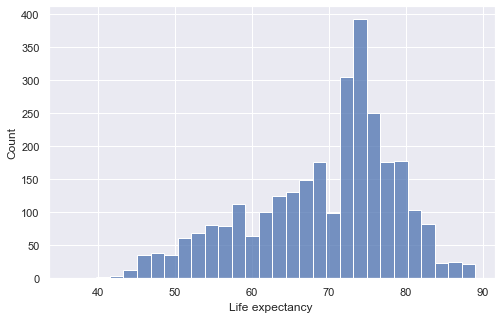

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Life expectancy ')
plt.show()

It looks like it is closed to a normal distribution

I want to compare Life Expectancy between Developed and Developing countries.

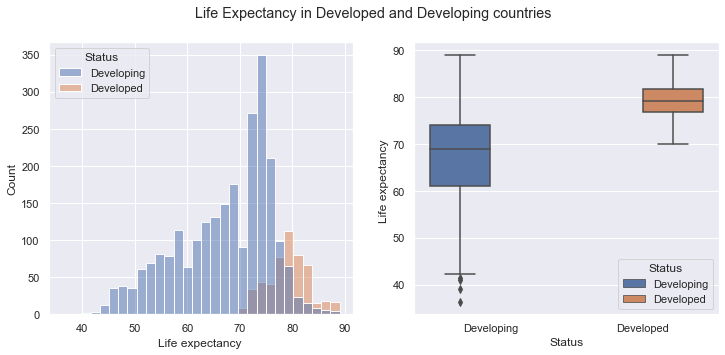

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Life Expectancy in Developed and Developing countries')
sns.histplot(data=data, x='Life expectancy ', hue=data.Status, ax=axes[0])
sns.boxplot(data=data, x='Status', y='Life expectancy ', hue='Status', ax=axes[1])
plt.show()

And what are the main factors that have mthe maximum impact on the Life Epectancy?

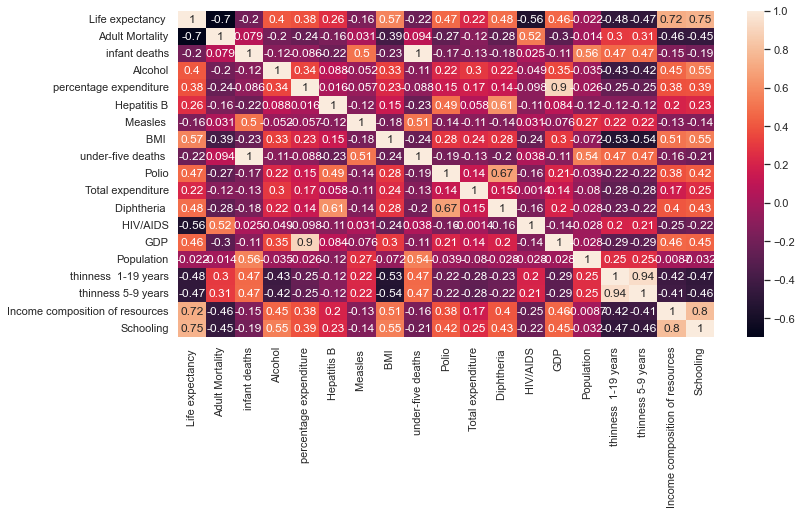

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),annot=True)
plt.show()

So, these are positevly correlated:
 - Schooling
 - Income composition of resources
 - BMI
 - Polio Immunization
 - Diphteria Immunization
 - GDP
    
and negatively:
 - Adult mortality
 - HIV/AIDS
 - thinness

As expected, the more you and a government spends on the healthcare and the higher GDP - the higher level of Life expectancy.

## Data Preparation

Let's find out if Israel is in the list of countries in this dataset and we have information about it.

In [8]:
data.Country.nunique()

193

Let's find out if Israel is in the list of countries in this dataset and we have information about it.

In [9]:
'Israel' in data.Country.unique()

True

So, I put my attention to Israel data and will perform a data analysis on it. But first, I need to create a copy of the dataset with only 'Israel' in it.

In [10]:
country = 'Israel'

isr = data.query("@country in Country")
isr.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1266,Israel,2015-01-01,Developing,82.5,58.0,0,NaN,0.000000,96.0,80,...,95.0,NaN,95.0,0.1,35729.37253,8381.0,1.2,1.1,0.898,16.0
1267,Israel,2014-01-01,Developing,82.2,6.0,1,2.62,4348.335310,97.0,6,...,95.0,7.81,95.0,0.1,37582.84624,82157.0,1.2,1.1,0.895,16.0
1268,Israel,2013-01-01,Developing,82.1,61.0,1,2.69,4279.895512,97.0,50,...,96.0,7.89,96.0,0.1,36393.66932,8595.0,1.2,1.1,0.891,15.9
1269,Israel,2012-01-01,Developing,81.8,6.0,1,2.78,3830.184587,97.0,211,...,94.0,7.73,94.0,0.1,32569.59683,7915.0,1.2,1.1,0.889,15.9
1270,Israel,2011-01-01,Developing,81.8,61.0,1,2.67,3793.161624,98.0,70,...,94.0,7.39,94.0,0.1,33657.15727,77658.0,1.2,1.1,0.883,15.8


Let's take a look on a data summary

In [11]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1266 to 1281
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          16 non-null     object        
 1   Year                             16 non-null     datetime64[ns]
 2   Status                           16 non-null     object        
 3   Life expectancy                  16 non-null     float64       
 4   Adult Mortality                  16 non-null     float64       
 5   infant deaths                    16 non-null     int64         
 6   Alcohol                          15 non-null     float64       
 7   percentage expenditure           16 non-null     float64       
 8   Hepatitis B                      16 non-null     float64       
 9   Measles                          16 non-null     int64         
 10   BMI                             16 non-null     float64   

Seems that we have some missing values in our dataframe - in `Alcohol` and in `Total expenditure` columns 

In [12]:
isr.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
isr[isr.Alcohol.isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1266,Israel,2015-01-01,Developing,82.5,58.0,0,NaN,0.0,96.0,80,...,95.0,NaN,95.0,0.1,35729.37253,8381.0,1.2,1.1,0.898,16.0


In [14]:
isr[isr['Total expenditure'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1266,Israel,2015-01-01,Developing,82.5,58.0,0,NaN,0.0,96.0,80,...,95.0,NaN,95.0,0.1,35729.37253,8381.0,1.2,1.1,0.898,16.0


So, there's only one observation made in 2015 where we have missing values of __Alcohol__ and __Total expenditure__. I decided to drop this row.

In [15]:
isr = isr.drop(index=1266, axis=0)

## EDA

Now I'm going to show the main statistics on the Israel related data.

The first one is the average life expectancy of a person in Israel. As can be seen from the chart below, the life expectancy was a bit less than 79 in 2000. It steadily moved up to 84 by 2006 with a minor drop in 2005. Then it was stable during 2006-2007 and sharply decreased in 2008, most probably because of the world economical crisis. But starting from 2009 it gradually rose. According to my additional findings on the Internet, life expectancy in Israel is currently more than 83. That means that the growing trend continued from 2014 up to nowadays.

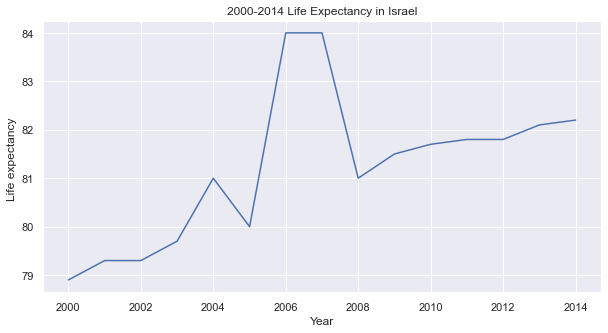

In [16]:
plt.figure(figsize = (10, 5))
g1 = sns.lineplot(x='Year', y='Life expectancy ', data=isr)
g1.set_title('2000-2014 Life Expectancy in Israel')
plt.show()

The next statistic I want to analyze is the mortality rate. It is divided into two groups - adult mortality and infant deaths. Adult mortality rate indicates probability of dying between 15 and 60 years per 1000 population of both sexes. This figure has been steadily decreasing over the years in Israel. Whereas the infant death rate (Number of Infant Deaths per 1000 population) is consistently low throughout the entire period of observation.

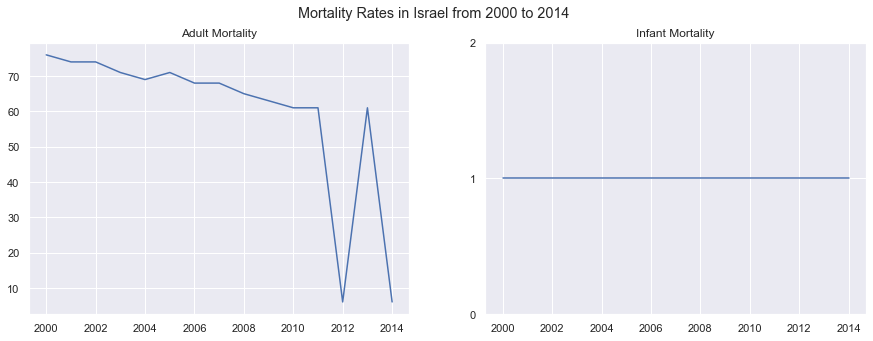

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Mortality Rates in Israel from 2000 to 2014')
g1 = sns.lineplot(x='Year', y='Adult Mortality', data=isr, ax=axes[0])
g1.set(xlabel=None, ylabel=None, title='Adult Mortality')

g2 = sns.lineplot(x='Year', y='infant deaths', data=isr, ax=axes[1])
g2.set(xlabel=None, ylabel=None, title='Infant Mortality', yticks=[0,1,2])

plt.show()

Another two aspects that with high probability affecting life expectancy are the __BMI__ - Average Body Mass Index of entire population and __Alcohol__ - recorded per capita (15+) consumption (in litres of pure alcohol).

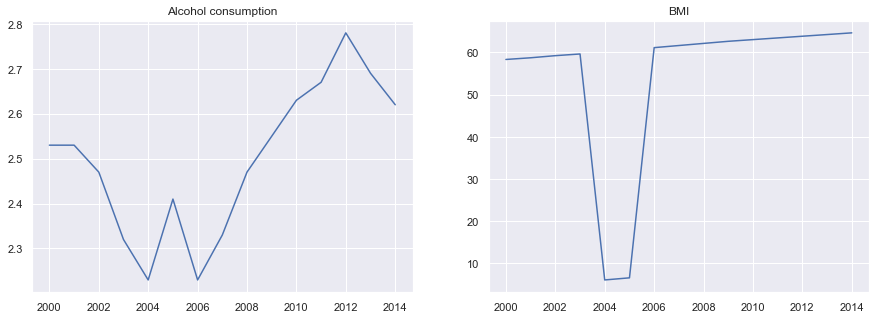

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

fig1 = sns.lineplot(x='Year', y='Alcohol', data=isr, ax=axes[0])
fig1.set(xlabel=None, ylabel=None, title='Alcohol consumption')

fig2 = sns.lineplot(x='Year', y=' BMI ', data=isr, ax=axes[1])
fig2.set(xlabel=None, ylabel=None, title='BMI')

plt.show()

Now I'd like to pay attention on the desease rates (number of cases) and immunization coverage against life-threatening deseases.
Obviously, the fewer cases the better, and immunization coverage the higher the better.

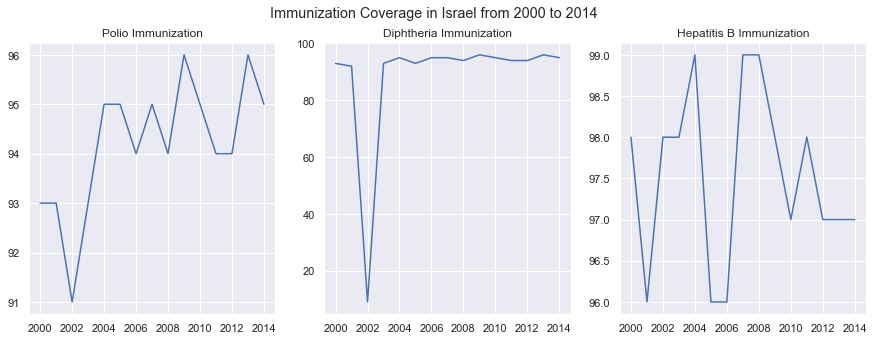

In [19]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(15, 5))
fig.suptitle('Immunization Coverage in Israel from 2000 to 2014')

fig1 = sns.lineplot(x='Year', y='Polio', data=isr, ax=axes[0])
fig1.set(xlabel=None, ylabel=None, title='Polio Immunization')

fig2 = sns.lineplot(x='Year', y='Diphtheria ', data=isr,ax=axes[1])
fig2.set(xlabel=None, ylabel=None, title='Diphtheria Immunization')

fig3 = sns.lineplot(x='Year', y='Hepatitis B', data=isr, ax=axes[2])
fig3.set(xlabel=None, ylabel=None, title='Hepatitis B Immunization')

plt.show()

In general, the levels of immunization against serious diseases were at a very high level in Israel in the period between 2000 and 2014. We can see a constantly high level of immunization against Hepatitis B in the range between 96-99%. Polio and Diphtheria Immunization are also on a high level, however, there was a drop in the year 2002 for both of them.

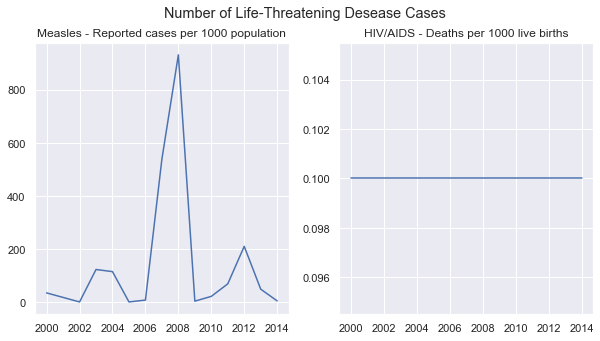

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Number of Life-Threatening Desease Cases')

fig1 = sns.lineplot(x='Year', y='Measles ', data=isr, ax=axes[0])
fig1.set(xlabel=None, ylabel=None, title='Measles - Reported cases per 1000 population')

fig2 = sns.lineplot(x='Year', y=' HIV/AIDS', data=isr, ax=axes[1])
fig2.set(xlabel=None, ylabel=None, title='HIV/AIDS - Deaths per 1000 live births')

plt.show()

It is noteworthy that in 2008 there was a surge in the incidence of measles. In the same year we saw a remarkable decrease of life expectancy.

Now I want to find other variables that can probably affect on our target variable, which is Life expectancy and compare them with the main factors we found while analysing entire dataset.
Let's take a closer look at the data. 

In [21]:
isr.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000
mean,81.220000,59.600000,1.0,2.497333,1565.371549,97.533333,142.866667,54.326667,1.0,94.200000,7.478667,88.600000,1.000000e-01,17735.882915,29161.666667,1.140000,1.100000e+00,0.871533,15.693333
std,1.577158,22.305669,0.0,0.168161,1685.373356,1.060099,258.319809,19.581495,0.0,1.320173,0.201170,22.051239,1.436488e-17,14610.028954,34168.162823,0.050709,2.298380e-16,0.014827,0.281493
min,78.900000,6.000000,1.0,2.230000,4.345102,96.000000,2.000000,6.100000,1.0,91.000000,7.130000,9.000000,1.000000e-01,236.196460,657.000000,1.100000,1.100000e+00,0.845000,15.100000
25%,79.850000,61.000000,1.0,2.370000,225.434217,97.000000,7.500000,58.950000,1.0,93.500000,7.365000,93.000000,1.000000e-01,2403.178105,6685.000000,1.100000,1.100000e+00,0.863000,15.650000
50%,81.500000,68.000000,1.0,2.530000,508.664544,98.000000,36.000000,61.600000,1.0,94.000000,7.440000,94.000000,1.000000e-01,18946.999420,7537.000000,1.100000,1.100000e+00,0.872000,15.800000
75%,81.950000,71.000000,1.0,2.625000,2844.252208,98.000000,120.000000,63.200000,1.0,95.000000,7.550000,95.000000,1.000000e-01,31113.519465,70876.500000,1.200000,1.100000e+00,0.880500,15.900000
max,84.000000,76.000000,1.0,2.780000,4348.335310,99.000000,931.000000,64.600000,1.0,96.000000,7.890000,96.000000,1.000000e-01,37582.846240,82157.000000,1.200000,1.100000e+00,0.895000,16.000000


I will drop non-numerical and some numerical variables which levels haven't changed during the peroid and therefore didn't change our dependant variable - infants deaths, HIV/AIDS, under-five deaths, thinness 1-19 years, thinness 5-9 years.

In [22]:
isr = isr.drop(['Country', 'Status', 'infant deaths', ' HIV/AIDS', 'under-five deaths ', ' thinness  1-19 years', ' thinness 5-9 years'], axis=1)
isr.head()

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling
1267,2014-01-01,82.2,6.0,2.62,4348.335310,97.0,6,64.6,95.0,7.81,95.0,37582.84624,82157.0,0.895,16.0
1268,2013-01-01,82.1,61.0,2.69,4279.895512,97.0,50,64.2,96.0,7.89,96.0,36393.66932,8595.0,0.891,15.9
1269,2012-01-01,81.8,6.0,2.78,3830.184587,97.0,211,63.8,94.0,7.73,94.0,32569.59683,7915.0,0.889,15.9
1270,2011-01-01,81.8,61.0,2.67,3793.161624,98.0,70,63.4,94.0,7.39,94.0,33657.15727,77658.0,0.883,15.8
1271,2010-01-01,81.7,61.0,2.63,409.410929,97.0,23,63.0,95.0,7.36,95.0,3661.99400,76236.0,0.878,15.7


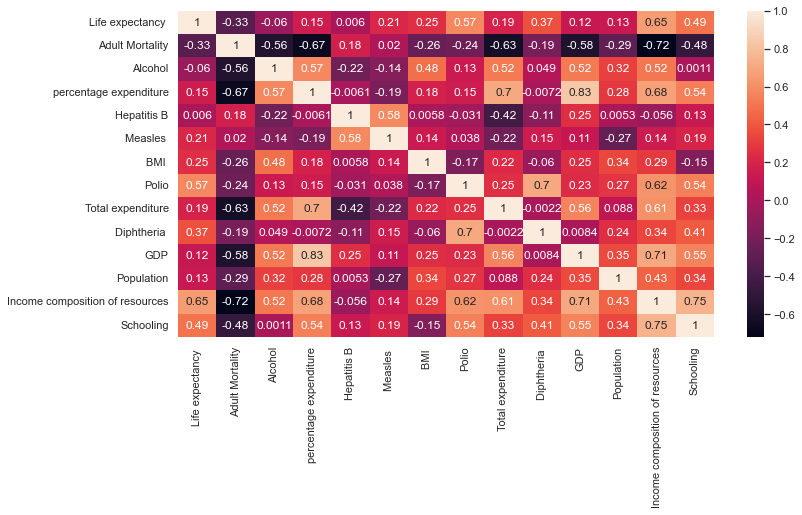

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(isr.corr(),annot=True)
plt.show()

It seems that Life expectancy in Israel highly positevely correlated with the 3 main factors:
- Income composition of resources (0.65) - Human Development Index in terms of income composition of resources
- Polio (0.57) - Polio (Pol3) immunization coverage among 1-year-olds 
- Schooling (0.49) - Number of years of Schooling

and negatively correlated with:
- Adult Mortality (-0.33)

<Figure size 720x576 with 0 Axes>

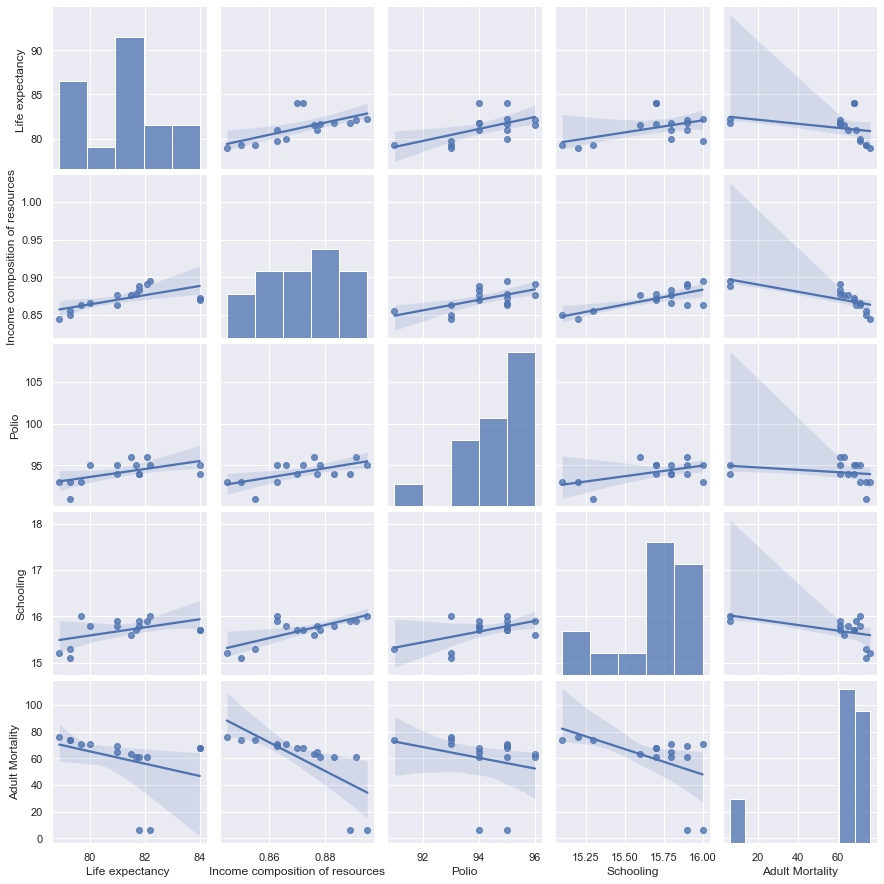

In [34]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=isr[['Life expectancy ', 'Income composition of resources', 'Polio','Schooling', 'Adult Mortality']], kind='reg')
plt.show()

## Comparative Analysis

Now I want to look on the countries which are the neighbors of Israel. Those are:

In [25]:
neighbors = ['Israel', 'Lebanon', 'Syria', 'Jordan', 'Egypt']

Let's see if the information from all of these countries collected in the dataset:

In [26]:
for country in neighbors:
    print(country in data.Country.unique())

True
True
False
True
True


Unfortunately, no information about Syria, so we will analyze data from Lebanon, Jordan and Egypt

In [27]:
israel_neighbors = data.loc[data.Country.isin(neighbors)]
israel_neighbors.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
802,Egypt,2015-01-01,Developing,79.0,159.0,51,NaN,0.0,93.0,5432,...,93.0,NaN,93.0,0.1,NaN,NaN,2.8,2.8,0.688,13.1
803,Egypt,2014-01-01,Developing,78.0,161.0,53,0.21,0.0,94.0,1314,...,94.0,5.64,94.0,0.1,NaN,NaN,2.8,2.8,0.686,13.1
804,Egypt,2013-01-01,Developing,79.0,159.0,54,0.21,0.0,97.0,405,...,97.0,5.46,97.0,0.1,NaN,NaN,2.9,2.8,0.681,12.8
805,Egypt,2012-01-01,Developing,72.0,165.0,54,0.23,0.0,93.0,245,...,93.0,5.29,93.0,0.1,NaN,NaN,2.9,2.8,0.673,12.4
806,Egypt,2011-01-01,Developing,74.0,168.0,55,0.22,0.0,96.0,26,...,96.0,5.40,96.0,0.1,NaN,NaN,2.9,2.9,0.671,12.4


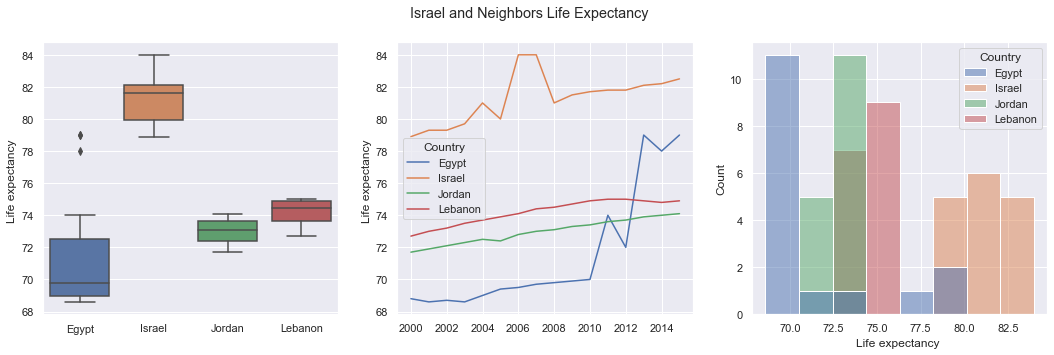

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Israel and Neighbors Life Expectancy')

fig1 = sns.boxplot(data=israel_neighbors, x='Country', y='Life expectancy ', ax=axes[0])
fig1.set(xlabel=None)

fig2 = sns.lineplot(data=israel_neighbors, x='Year', y='Life expectancy ', hue='Country', ax=axes[1])
fig2.set(xlabel=None)

fig3 = sns.histplot(x='Life expectancy ', data=israel_neighbors, hue='Country', ax=axes[2])
fig2.set(xlabel=None)

plt.show()

In [29]:
israel_neighbors.groupby('Country').agg('mean')

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Egypt,71.5000,170.6250,56.2500,0.188667,0.000000,96.6875,1069.2500,49.2625,67.625,96.6875,5.346000,96.6875,0.1,NaN,NaN,3.12500,3.07500,0.647625,11.89375
Israel,81.3000,59.5000,0.9375,2.497333,1467.535827,97.4375,138.9375,54.9875,1.000,94.2500,7.478667,89.0000,0.1,18860.476016,2.786288e+04,1.14375,1.10000,0.873188,15.71250
Jordan,72.9875,114.3125,4.0000,0.517333,273.599534,97.0000,26.5000,53.0000,4.000,97.1250,8.781333,97.0000,0.1,1822.629926,4.895076e+06,3.88750,3.86875,0.729000,13.23750
Lebanon,74.2000,65.3125,1.0000,1.785333,333.047945,70.5000,295.1875,55.3375,1.000,71.2500,6.670667,70.5000,0.1,4696.192379,2.489104e+06,4.76875,4.71875,0.469687,13.74375


Compare the main influencing factors:

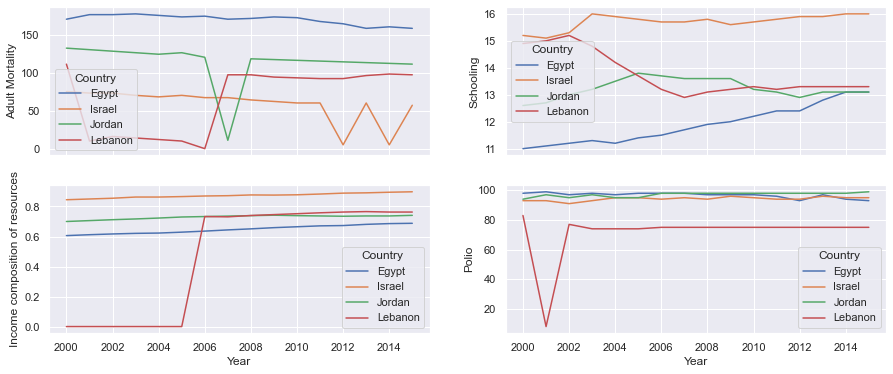

In [30]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 6))

fig1 = sns.lineplot(data=israel_neighbors, x='Year', y='Adult Mortality', hue='Country', ax=axes[0,0])
fig2 = sns.lineplot(data=israel_neighbors, x='Year', y='Schooling', hue='Country', ax=axes[0, 1])
fig3 = sns.lineplot(data=israel_neighbors, x='Year', y='Income composition of resources', hue='Country', ax=axes[1, 0])
fig4 = sns.lineplot(data=israel_neighbors, x='Year', y='Polio', hue='Country', ax=axes[1, 1])

plt.show()

We found the level of Life Expectancy in Israel and analyzed it determining the correlation with the given features. It is seen that the level of this factor is lower in the neighboring countries. Together with that, the maximum correlated factors are also on the lower level in the neighboring countries. 

Nevertheless, a positive trend can be found, especially in Egypt. Starting from 2010 Life Expectancy rose heavily and continues to increase, which is a good sign.

## Conclusion

We analyzed data and found the main variables that have the maximum impact on the target variable, which is Life Expectancy.

Then we looked at the information about Israel and got its trend lines.

Finally, we compared the discovered variables between Israel and its neighbors and explained the difference.